In [113]:
import pandas as pd

import matplotlib.pyplot as plt

import requests

In [114]:
URL = "https://support.kembit.nl/tas/api"

USERNAME = "api.brightlands@kembit.nl"
APP_PASSWORD = "26l4i-bmhek-5nt2d-wmalq-koedu"

In [115]:
s = requests.Session()
s.auth = (USERNAME, APP_PASSWORD)

In [116]:
query = [
    "operatorGroup.name=='Expertteam - Networking'",
    "status.name=='Afgerond'",
    "creationDate=ge=2020-01-01T00:00:00Z",
    "creationDate=le=2022-01-01T00:00:00Z",
    "archived==false"
]

fields = [
    "timeSpent",
    "category.name",
    "subcategory.name",
    "creationDate"
]

parameters = dict(
    query = ';'.join(query),
    fields = ','.join(fields),
    pageSize = 5000
)

incomplete_result = True
results = []
page_number = 0

while incomplete_result:
    r = s.get(f"{URL}/operatorChangeActivities", params={**parameters, **dict(pageStart=page_number)})

    page_number += 1

    results.extend(r.json().get('results'))

    incomplete_result = r.status_code == 206

In [124]:
df = pd.json_normalize(results).dropna().convert_dtypes()

df = df.loc[df['category.name'] == 'Netwerk']

df.timeSpent = df.timeSpent / 3600 # twee keer delen door 60 om naar uren te zetten

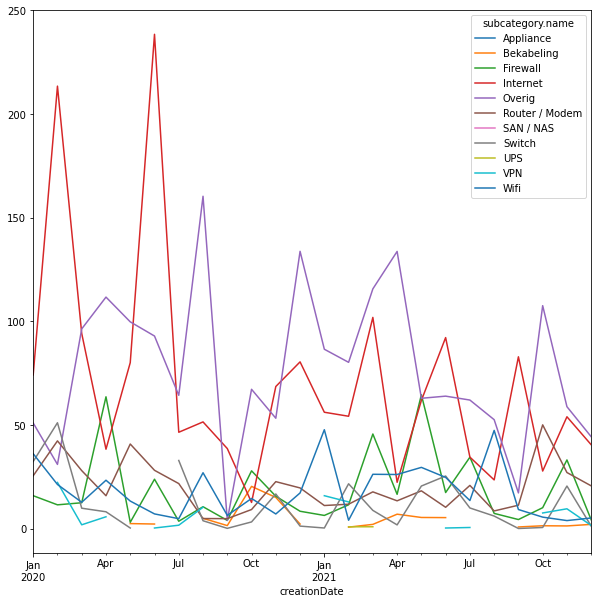

In [126]:
# data = (df
#     .groupby(['category.name', 'subcategory.name'])
#     .sum()
# )

df.creationDate = pd.to_datetime(df.creationDate)

plot = (df.groupby([pd.Grouper(key='creationDate', freq='BM'), 'subcategory.name'])
    .sum()
    .pivot_table(values='timeSpent', index='creationDate', columns=['subcategory.name'])
    .plot(kind='line', figsize=(10,10))
    )



# fig, ax = plt.subplots()

# bar1 = df[['category.name', 'timeSpent']].groupby('category.name').sum()
# ax.barh(bar1.index, bar1.values.flatten(), 0.6, label='a')


# ax.legend()
# fig.show()

# data.plot(kind='barh', subplots=True, stacked=True, sort_columns=True)

# 

In [ ]:
# categories_rel = df.groupby(['category.name', 'subcategory.name']).size().index.tolist()
# categories = df['category.name'].dropna().unique().tolist()
# subcategories = df['subcategory.name'].dropna().unique().tolist()

# categories = pd.Series(categories + subcategories).sort_values()

In [ ]:
# import plotly.graph_objects as go
# from sklearn.preprocessing import LabelEncoder

# cls = LabelEncoder()
# y = cls.fit_transform(categories)

# relations = [cls.transform([a, b]).tolist() for a, b in categories_rel]

In [ ]:
# lvl1 = df[['category.name', 'timeSpent']].groupby('category.name').sum()
# lvl2 = df[['subcategory.name', 'timeSpent']].groupby('subcategory.name').sum()

In [ ]:
# source = [n[0] for n in relations]
# target = [n[1] for n in relations]
# value = lvl2['timeSpent'].to_list()
# label = cls.classes_

# link = dict(source = source, target = target, value = value)
# node = dict(label=label,pad=50, thickness=10)
# data = go.Sankey(link = link, node=node)

# fig = go.Figure(data)
# fig.show()